### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
# from src.evaluation.evaluator_manager import EvaluatorManager
# from src.evaluation.future.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer

from src.evaluation.future.evaluator_manager_triplets import EvaluatorManager

In [4]:
# config_f_name = 'ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc'
# config_f_name = 'ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_RSGG.jsonc'

# config_f_name = 'ensembles/triplets/TCR-TCO/il-explainer-selector.jsonc'
# config_f_name = 'ensembles/triplets/TCR-TCO/dl-explainer-selector.jsonc'

# config_f_name = 'ensembles/triplets/imdb/iRand.jsonc'
# config_f_name = 'ensembles/imdb/base_explainers_t0/base_explainers_t0_fold0.json'
# config_f_name = 'ensembles/qualitative/clear.jsonc'
# config_f_name = 'ensembles/qualitative/cf2.jsonc'
config_f_name = 'ensembles/qualitative/union.jsonc'

### Evaluating the explainer

In [5]:
# config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
# runno = 1
    
# print(f"Generating context for: {config_path}")
# context = Context.get_context(config_path)
# context.run_number = runno

# context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
# context.logger.info("Creating the evaluation manager....................................")

# context.logger.info("Creating the evaluators......................................................")
# eval_manager = EvaluatorManager(context)

Generating context for: /NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/lab/config/ensembles/qualitative/clear.jsonc
2024-08-14 16:41:26,1364600698 | INFO | 29147 - Executing: /NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/lab/config/ensembles/qualitative/clear.jsonc Run: 1
2024-08-14 16:41:26,1364600713 | INFO | 29147 - Creating the evaluation manager....................................
2024-08-14 16:41:26,1364600724 | INFO | 29147 - Creating the evaluators......................................................
2024-08-14 16:41:26,1364600841 | INFO | 29147 - Loading: TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
2024-08-14 16:41:26,1364600976 | INFO | 29147 - Created: TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
2024-08-14 16:41:26,1364601153 | INFO | 29147 - Creating: TreeCyclesOracle-ed657151860d845d299e66044322ae14
2024-08-14 16:41:26,1364601165 | INFO | 29147 - TreeCyclesOracle trained in: 1.430511474609375e-06 secs
2024-08-14 16:41:26,1364601208 | INFO | 29147 - Saved: TreeCyclesOracle-ed

In [17]:
# evaluator = eval_manager._evaluators[0]

# n_nodes = [inst.data.shape[0] for inst in evaluator.dataset.instances]
# max(n_nodes)

136

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")

context.logger.info("Creating the evaluators......................................................")
eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: /NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/lab/config/ensembles/qualitative/union.jsonc
2024-08-14 21:44:03,1382758155 | INFO | 101155 - Executing: /NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/lab/config/ensembles/qualitative/union.jsonc Run: 1
2024-08-14 21:44:03,1382758168 | INFO | 101155 - Creating the evaluation manager....................................
2024-08-14 21:44:03,1382758179 | INFO | 101155 - Creating the evaluators......................................................
2024-08-14 21:44:03,1382758303 | INFO | 101155 - Loading: TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
2024-08-14 21:44:04,1382758409 | INFO | 101155 - Created: TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
2024-08-14 21:44:04,1382758613 | INFO | 101155 - Creating: TreeCyclesOracle-ed657151860d845d299e66044322ae14
2024-08-14 21:44:04,1382758626 | INFO | 101155 - TreeCyclesOracle trained in: 1.430511474609375e-06 secs
2024-08-14 21:44:04,1382758708 | INFO | 101155 - Saved: TreeCyclesO

/NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/src/legacy/explainer/generative/gans/graph/res_gen.py:64: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  edge_weights = torch.add(edge_weights, rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T, self.device))


2024-08-14 21:44:09,1382763426 | INFO | 101155 - evaluated instance with id 0
2024-08-14 21:44:09,1382763427 | INFO | 101155 - Evaluating instance with id 1
2024-08-14 21:44:10,1382764772 | INFO | 101155 - evaluated instance with id 1
2024-08-14 21:44:10,1382764776 | INFO | 101155 - Evaluating instance with id 2
2024-08-14 21:44:11,1382766120 | INFO | 101155 - evaluated instance with id 2
2024-08-14 21:44:11,1382766128 | INFO | 101155 - Evaluating instance with id 3
2024-08-14 21:44:13,1382767652 | INFO | 101155 - evaluated instance with id 3
2024-08-14 21:44:13,1382767655 | INFO | 101155 - Evaluating instance with id 4
2024-08-14 21:45:27,1382841736 | INFO | 101155 - evaluated instance with id 4
2024-08-14 21:45:27,1382841749 | INFO | 101155 - Evaluating instance with id 5
2024-08-14 21:46:47,1382921328 | INFO | 101155 - evaluated instance with id 5
2024-08-14 21:46:47,1382921335 | INFO | 101155 - Evaluating instance with id 6
2024-08-14 21:47:42,1382976821 | INFO | 101155 - evaluated

In [6]:
exp_inst = []
for exp in eval_manager.evaluators[0]._explanations:
    exp.input_instance._dataset = None
    exp.counterfactual_instances[0]._dataset = None
    
exp_inst = [(exp.input_instance, exp.counterfactual_instances[0]) for exp in eval_manager.evaluators[0]._explanations]

In [7]:
import pickle

pickle_path = os.path.join(module_path, 'lab', 'pickles', 'union.pkl')

with open(pickle_path, 'wb') as pickle_file:
            pickle.dump(exp_inst, pickle_file)

In [8]:
with open(os.path.join(module_path, 'lab', 'pickles', 'union.pkl'), 'rb') as clear_file:
    clear_exp = pickle.load(clear_file)

### Aggregating the stats

In [5]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95f8bca65
TreeCyclesRand-cb519bb4e5768b2dc9cc04b95

,scope,dataset,oracle,explainer,Runtime,Runtime-std,GraphEditDistance,GraphEditDistance-std,Correctness,Correctness-std,OracleCalls,OracleCalls-std,OracleAccuracy,OracleAccuracy-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Instability,Instability-std
0,xai-ens-asd,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationMultiCriteriaAggregator,211.657759,35.730723,8.911818,2.667819,1.000000,0.000000,5812.985455,583.287964,0.773636,0.104798,0.020093,0.006049,0.547273,0.209596,1.002813,0.001543
1,xai-ens-asd,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationStochasticAggregator,228.281466,52.532883,91.245909,15.527264,1.000000,0.000000,5761.752727,501.545682,0.773636,0.104798,0.205615,0.035011,0.547273,0.209596,0.972166,0.016495
2,xai-ens-asd,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,219.533001,33.331162,0.000000,0.000000,0.000000,0.000000,5817.239091,575.852626,0.773636,0.104798,0.000000,0.000000,0.000000,0.000000,0.998999,0.000069
3,xai-ens-asd,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationBidirectionalSearch,267.091272,45.491886,13.030714,4.479636,0.574545,0.116831,6267.499091,499.526945,0.773636,0.104798,0.029410,0.010176,0.574545,0.116831,1.001414,0.001738
4,xai-ens-asd,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,232.174510,49.096034,0.250000,0.512348,0.019091,0.038236,5719.732727,548.221054,0.773636,0.104798,0.000561,0.001149,-0.019091,0.038236,0.981640,0.005303
5,xai-ens-asd,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationRandom,243.448140,45.531990,0.150000,0.229129,0.029091,0.044499,5947.395455,623.230466,0.773636,0.104798,0.000338,0.000516,-0.009091,0.052381,0.999003,0.000025
6,xai-ens-asd,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,232.680348,47.044103,217.339861,44.427534,0.940909,0.065839,5794.040000,517.171256,0.773636,0.104798,0.489851,0.100952,0.488182,0.209724,0.931670,0.041226
7,xai-ens-asd,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,212.847775,41.799704,9.009091,2.492063,1.000000,0.000000,5728.440000,628.639048,0.773636,0.104798,0.020308,0.005645,0.547273,0.209596,1.002743,0.001361
8,xai-ens-asd,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,IRandExplainer,3.515603,0.746095,100.470794,35.749031,0.654545,0.106406,1146.750909,208.121988,0.770909,0.111103,0.226500,0.080482,0.236364,0.152825,1.098501,0.016209
9,xai-ens-asd,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,RSGG,65.319065,14.375991,350.047857,25.414409,0.466364,0.129337,606.255455,90.925438,0.770909,0.111103,0.788611,0.057844,0.226364,0.176019,0.863959,0.038371


### Visualizing individual instances

In [ ]:
evaluator = eval_manager.evaluators[0]
evaluator

In [ ]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

# Drawing Instances

In [4]:
import pickle

with open(os.path.join(module_path, 'lab', 'pickles', 'cf2.pkl'), 'rb') as cf2_file:
    cf2_exp = pickle.load(cf2_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'clear.pkl'), 'rb') as clear_file:
    clear_exp = pickle.load(clear_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'irand.pkl'), 'rb') as irand_file:
    irand_exp = pickle.load(irand_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'obs.pkl'), 'rb') as obs_file:
    obs_exp = pickle.load(obs_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'rsgg.pkl'), 'rb') as rsgg_file:
    rsgg_exp = pickle.load(rsgg_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'bidirectional.pkl'), 'rb') as bi_file:
    bi_exp = pickle.load(bi_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'union.pkl'), 'rb') as union_file:
    union_exp = pickle.load(union_file)


In [5]:
i = 7

og_inst = cf2_exp[i][0]
cf2_cf = cf2_exp[i][1]
print(og_inst.id, cf2_cf.id)

clear_cf = clear_exp[i][1]
print(clear_exp[i][0].id, clear_cf.id)

irand_cf = irand_exp[i][1]
print(irand_exp[i][0].id, irand_cf.id)

obs_cf = obs_exp[i][1]
print(obs_exp[i][0].id, obs_cf.id)

rsgg_cf = rsgg_exp[i][1]
print(rsgg_exp[i][0].id, rsgg_cf.id)

union_cf = union_exp[i][1]
print(union_exp[i][0].id, union_cf.id)

bi_cf = bi_exp[i][1]
print(bi_exp[i][0].id, bi_cf.id)

6 6
6 6
6 6
6 6
6 6
6 6
6 6


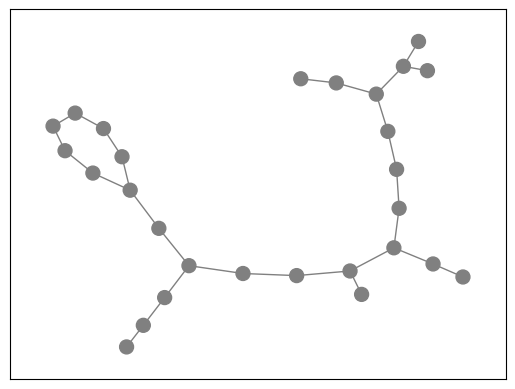

In [29]:
pos = data_analyzer.draw_graph(og_inst)

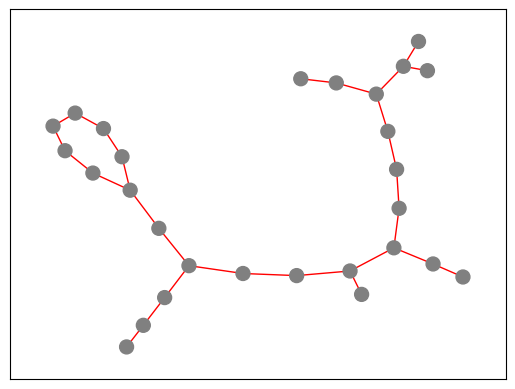

In [30]:
data_analyzer.draw_counterfactual_actions(og_inst, cf2_cf, position=pos)

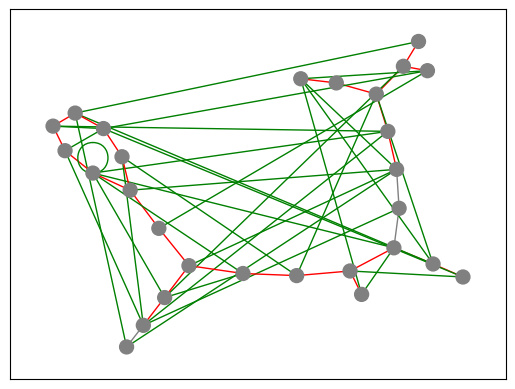

In [31]:
data_analyzer.draw_counterfactual_actions(og_inst, clear_cf, position=pos)

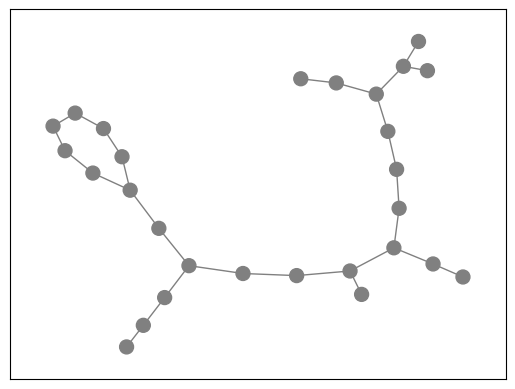

In [32]:
data_analyzer.draw_counterfactual_actions(og_inst, irand_cf, position=pos)

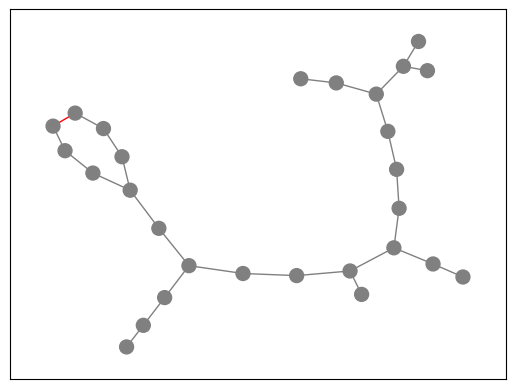

In [33]:
data_analyzer.draw_counterfactual_actions(og_inst, obs_cf, position=pos)

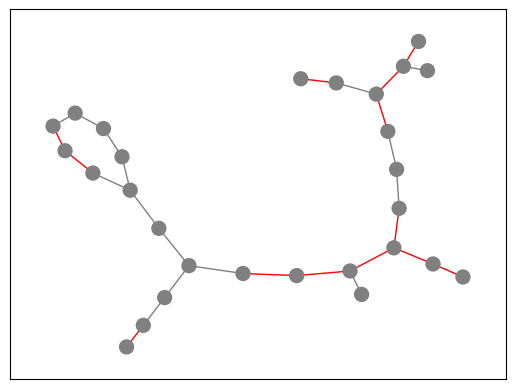

In [34]:
data_analyzer.draw_counterfactual_actions(og_inst, rsgg_cf, position=pos)

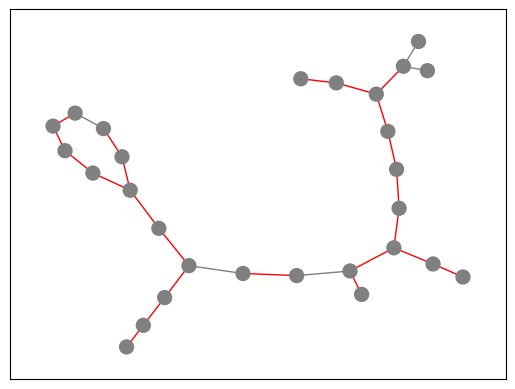

In [35]:
data_analyzer.draw_counterfactual_actions(og_inst, union_cf, position=pos)

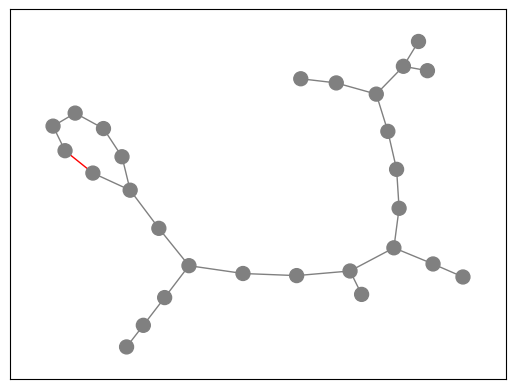

In [36]:
data_analyzer.draw_counterfactual_actions(og_inst, bi_cf, position=pos)

# End Paper Experiments

In [ ]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [ ]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

In [ ]:
pos = data_analyzer.draw_graph(og_inst)

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)